## FE&EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import scipy.stats as stat

### loading the data and making a backup copy

In [2]:
df = pd.read_csv('../data/fraud-detection-raw.csv')
df_copy = pd.read_csv('../data/fraud-detection-raw.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

### approach to the FE&EDA

In [14]:
### so here, I am planning to drop the transaction id and user id column, Fraud_label is our target feature
### I will then see the categorical columns and numerical coumns one by one
### in this notebook, I am not considering the part of outliers for initial stages, later on I will
### Transaction_type, device_type, loaction, merchent_category, card_type and auth_method are categorical columns
### and the rest are numerical columns, but I will also see the distribution for them

## FE & EDA

In [4]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [5]:
df['Transaction_ID'].value_counts()

Transaction_ID
TXN_5311     1
TXN_37819    1
TXN_39188    1
TXN_17568    1
TXN_19769    1
            ..
TXN_39489    1
TXN_12447    1
TXN_199      1
TXN_9427     1
TXN_33553    1
Name: count, Length: 50000, dtype: int64

In [9]:
df['User_ID'].value_counts()

User_ID
USER_6599    16
USER_9998    16
USER_3925    16
USER_3415    15
USER_5014    15
             ..
USER_4000     1
USER_1501     1
USER_5657     1
USER_8613     1
USER_5580     1
Name: count, Length: 8963, dtype: int64

In [11]:
df['Transaction_ID'].isna().sum()

np.int64(0)

In [12]:
df['User_ID'].isna().sum()

np.int64(0)

In [5]:
df.drop(['Transaction_ID', 'User_ID'], axis = 1, inplace = True)
df.head()

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


### Categorical columns first

### Transaction_type column

In [6]:
df['Transaction_Type'].value_counts()

Transaction_Type
POS               12549
Online            12546
ATM Withdrawal    12453
Bank Transfer     12452
Name: count, dtype: int64

In [16]:
df['Transaction_Type'].isna().sum()

np.int64(0)

In [17]:
### I am gonna use one hot encoding for this column

In [7]:
transaction_type = pd.get_dummies(df['Transaction_Type'], dtype = int, prefix = 'transaction_type')
df = pd.concat([df, transaction_type], axis = 1)
df.head()

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,...,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,transaction_type_ATM Withdrawal,transaction_type_Bank Transfer,transaction_type_Online,transaction_type_POS
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,...,65,883.17,Biometric,0.8494,0,0,0,0,0,1
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,...,186,2203.36,Password,0.0959,0,1,0,1,0,0
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,...,226,1909.29,Biometric,0.8400,0,1,0,0,1,0
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,...,76,1311.86,OTP,0.7935,0,1,1,0,0,0
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,...,140,966.98,Password,0.3819,1,1,0,0,0,1


In [8]:
df.drop(['Transaction_Type', 'transaction_type_Bank Transfer'], axis = 1, inplace = True)
df.head()

,Transaction_Amount,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,...,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS
0,39.79,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,...,Amex,65,883.17,Biometric,0.8494,0,0,0,0,1
1,1.19,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,...,Mastercard,186,2203.36,Password,0.0959,0,1,0,0,0
2,28.96,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,...,Visa,226,1909.29,Biometric,0.8400,0,1,0,1,0
3,254.32,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,...,Visa,76,1311.86,OTP,0.7935,0,1,1,0,0
4,31.28,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,...,Mastercard,140,966.98,Password,0.3819,1,1,0,0,1


### Device_type column

In [9]:
df['Device_Type'].value_counts()

Device_Type
Tablet    16779
Mobile    16640
Laptop    16581
Name: count, dtype: int64

In [10]:
df['Device_Type'].isna().sum()

0

In [22]:
### using one hot again, just like the transaction_type column

In [11]:
device_type = pd.get_dummies(df['Device_Type'], dtype = int, prefix = 'device_type')
df = pd.concat([df, device_type], axis = 1)
df.head()

,Transaction_Amount,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,...,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,device_type_Tablet
0,39.79,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,...,Biometric,0.8494,0,0,0,0,1,1,0,0
1,1.19,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,...,Password,0.0959,0,1,0,0,0,0,1,0
2,28.96,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,...,Biometric,0.8400,0,1,0,1,0,0,0,1
3,254.32,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,...,OTP,0.7935,0,1,1,0,0,0,0,1
4,31.28,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,...,Password,0.3819,1,1,0,0,1,0,1,0


In [12]:
df.drop(['Device_Type', 'device_type_Tablet'], axis = 1, inplace = True)
df.head()

,Transaction_Amount,Timestamp,Account_Balance,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,...,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile
0,39.79,2023-08-14 19:30:00,93213.17,Sydney,Travel,0,0,7,437.63,3,...,883.17,Biometric,0.8494,0,0,0,0,1,1,0
1,1.19,2023-06-07 04:01:00,75725.25,New York,Clothing,0,0,13,478.76,4,...,2203.36,Password,0.0959,0,1,0,0,0,0,1
2,28.96,2023-06-20 15:25:00,1588.96,Mumbai,Restaurants,0,0,14,50.01,4,...,1909.29,Biometric,0.8400,0,1,0,1,0,0,0
3,254.32,2023-12-07 00:31:00,76807.20,New York,Clothing,0,0,8,182.48,4,...,1311.86,OTP,0.7935,0,1,1,0,0,0,0
4,31.28,2023-11-11 23:44:00,92354.66,Mumbai,Electronics,0,1,14,328.69,4,...,966.98,Password,0.3819,1,1,0,0,1,0,1


### handling the location column

In [13]:
df['Location'].value_counts()

Location
Tokyo       10208
Mumbai       9994
London       9945
Sydney       9938
New York     9915
Name: count, dtype: int64

In [26]:
df['Location'].isna().sum()

np.int64(0)

In [27]:
### same logic for this one as well

In [14]:
location = pd.get_dummies(df['Location'], dtype = int, prefix = 'location')
df = pd.concat([df, location], axis = 1)
df.head()

,Transaction_Amount,Timestamp,Account_Balance,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,...,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_London,location_Mumbai,location_New York,location_Sydney,location_Tokyo
0,39.79,2023-08-14 19:30:00,93213.17,Sydney,Travel,0,0,7,437.63,3,...,0,0,1,1,0,0,0,0,1,0
1,1.19,2023-06-07 04:01:00,75725.25,New York,Clothing,0,0,13,478.76,4,...,0,0,0,0,1,0,0,1,0,0
2,28.96,2023-06-20 15:25:00,1588.96,Mumbai,Restaurants,0,0,14,50.01,4,...,0,1,0,0,0,0,1,0,0,0
3,254.32,2023-12-07 00:31:00,76807.20,New York,Clothing,0,0,8,182.48,4,...,1,0,0,0,0,0,0,1,0,0
4,31.28,2023-11-11 23:44:00,92354.66,Mumbai,Electronics,0,1,14,328.69,4,...,0,0,1,0,1,0,1,0,0,0


In [15]:
df.drop(['Location', 'location_London'], axis = 1, inplace = True)
df.head()

,Transaction_Amount,Timestamp,Account_Balance,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,...,Fraud_Label,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo
0,39.79,2023-08-14 19:30:00,93213.17,Travel,0,0,7,437.63,3,Amex,...,0,0,0,1,1,0,0,0,1,0
1,1.19,2023-06-07 04:01:00,75725.25,Clothing,0,0,13,478.76,4,Mastercard,...,1,0,0,0,0,1,0,1,0,0
2,28.96,2023-06-20 15:25:00,1588.96,Restaurants,0,0,14,50.01,4,Visa,...,1,0,1,0,0,0,1,0,0,0
3,254.32,2023-12-07 00:31:00,76807.20,Clothing,0,0,8,182.48,4,Visa,...,1,1,0,0,0,0,0,1,0,0
4,31.28,2023-11-11 23:44:00,92354.66,Electronics,0,1,14,328.69,4,Mastercard,...,1,0,0,1,0,1,1,0,0,0


### merchant category column

In [30]:
df['Merchant_Category'].isna().sum()

np.int64(0)

In [16]:
df['Merchant_Category'].value_counts()

Merchant_Category
Clothing       10033
Groceries      10019
Travel         10015
Restaurants     9976
Electronics     9957
Name: count, dtype: int64

In [17]:
merchant = pd.get_dummies(df['Merchant_Category'], dtype = int, prefix = 'merchant')
df = pd.concat([df, merchant], axis = 1)
df.drop(['Merchant_Category', 'merchant_Clothing'], axis = 1, inplace = True)
df.head()

,Transaction_Amount,Timestamp,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,...,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,merchant_Electronics,merchant_Groceries,merchant_Restaurants,merchant_Travel
0,39.79,2023-08-14 19:30:00,93213.17,0,0,7,437.63,3,Amex,65,...,1,0,0,0,1,0,0,0,0,1
1,1.19,2023-06-07 04:01:00,75725.25,0,0,13,478.76,4,Mastercard,186,...,0,1,0,1,0,0,0,0,0,0
2,28.96,2023-06-20 15:25:00,1588.96,0,0,14,50.01,4,Visa,226,...,0,0,1,0,0,0,0,0,1,0
3,254.32,2023-12-07 00:31:00,76807.20,0,0,8,182.48,4,Visa,76,...,0,0,0,1,0,0,0,0,0,0
4,31.28,2023-11-11 23:44:00,92354.66,0,1,14,328.69,4,Mastercard,140,...,0,1,1,0,0,0,1,0,0,0


### auth_method column

In [41]:
### same approach for this and card type as well

In [18]:
df['Authentication_Method'].isna().sum()

0

In [37]:
df['Authentication_Method'].value_counts()

Authentication_Method
Biometric    12591
PIN          12586
Password     12457
OTP          12366
Name: count, dtype: int64

In [19]:
auth_method = pd.get_dummies(df['Authentication_Method'], dtype = int, prefix = 'auth_method')
df = pd.concat([df, auth_method], axis = 1)
df.drop(['Authentication_Method', 'auth_method_Password'], axis = 1, inplace = True)
df.head()

,Transaction_Amount,Timestamp,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,...,location_New York,location_Sydney,location_Tokyo,merchant_Electronics,merchant_Groceries,merchant_Restaurants,merchant_Travel,auth_method_Biometric,auth_method_OTP,auth_method_PIN
0,39.79,2023-08-14 19:30:00,93213.17,0,0,7,437.63,3,Amex,65,...,0,1,0,0,0,0,1,1,0,0
1,1.19,2023-06-07 04:01:00,75725.25,0,0,13,478.76,4,Mastercard,186,...,1,0,0,0,0,0,0,0,0,0
2,28.96,2023-06-20 15:25:00,1588.96,0,0,14,50.01,4,Visa,226,...,0,0,0,0,0,1,0,1,0,0
3,254.32,2023-12-07 00:31:00,76807.20,0,0,8,182.48,4,Visa,76,...,1,0,0,0,0,0,0,0,1,0
4,31.28,2023-11-11 23:44:00,92354.66,0,1,14,328.69,4,Mastercard,140,...,0,0,0,1,0,0,0,0,0,0


### card_type column

In [20]:
df['Card_Type'].isna().sum()

0

In [43]:
df['Card_Type'].value_counts()

Card_Type
Mastercard    12693
Visa          12560
Amex          12419
Discover      12328
Name: count, dtype: int64

In [21]:
card_type = pd.get_dummies(df['Card_Type'], dtype = int, prefix = 'card_type')
df = pd.concat([df, card_type], axis = 1)
df.drop(['Card_Type', 'card_type_Mastercard'], axis = 1, inplace = True)
df.head()

,Transaction_Amount,Timestamp,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,...,merchant_Electronics,merchant_Groceries,merchant_Restaurants,merchant_Travel,auth_method_Biometric,auth_method_OTP,auth_method_PIN,card_type_Amex,card_type_Discover,card_type_Visa
0,39.79,2023-08-14 19:30:00,93213.17,0,0,7,437.63,3,65,883.17,...,0,0,0,1,1,0,0,1,0,0
1,1.19,2023-06-07 04:01:00,75725.25,0,0,13,478.76,4,186,2203.36,...,0,0,0,0,0,0,0,0,0,0
2,28.96,2023-06-20 15:25:00,1588.96,0,0,14,50.01,4,226,1909.29,...,0,0,1,0,1,0,0,0,0,1
3,254.32,2023-12-07 00:31:00,76807.20,0,0,8,182.48,4,76,1311.86,...,0,0,0,0,0,1,0,0,0,1
4,31.28,2023-11-11 23:44:00,92354.66,0,1,14,328.69,4,140,966.98,...,1,0,0,0,0,0,0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transaction_Amount               50000 non-null  float64
 1   Timestamp                        50000 non-null  object 
 2   Account_Balance                  50000 non-null  float64
 3   IP_Address_Flag                  50000 non-null  int64  
 4   Previous_Fraudulent_Activity     50000 non-null  int64  
 5   Daily_Transaction_Count          50000 non-null  int64  
 6   Avg_Transaction_Amount_7d        50000 non-null  float64
 7   Failed_Transaction_Count_7d      50000 non-null  int64  
 8   Card_Age                         50000 non-null  int64  
 9   Transaction_Distance             50000 non-null  float64
 10  Risk_Score                       50000 non-null  float64
 11  Is_Weekend                       50000 non-null  int64  
 12  Fraud_Label       

### Reducing the dimensonality

In [46]:
### as there are a lot of columns in the dataset, my target now is to dump the numeric columns
### with no meaningful trend, like the ip_address flag column where it's imbalanced and not much of a value

In [23]:
df.head()

,Transaction_Amount,Timestamp,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,...,merchant_Electronics,merchant_Groceries,merchant_Restaurants,merchant_Travel,auth_method_Biometric,auth_method_OTP,auth_method_PIN,card_type_Amex,card_type_Discover,card_type_Visa
0,39.79,2023-08-14 19:30:00,93213.17,0,0,7,437.63,3,65,883.17,...,0,0,0,1,1,0,0,1,0,0
1,1.19,2023-06-07 04:01:00,75725.25,0,0,13,478.76,4,186,2203.36,...,0,0,0,0,0,0,0,0,0,0
2,28.96,2023-06-20 15:25:00,1588.96,0,0,14,50.01,4,226,1909.29,...,0,0,1,0,1,0,0,0,0,1
3,254.32,2023-12-07 00:31:00,76807.20,0,0,8,182.48,4,76,1311.86,...,0,0,0,0,0,1,0,0,0,1
4,31.28,2023-11-11 23:44:00,92354.66,0,1,14,328.69,4,140,966.98,...,1,0,0,0,0,0,0,0,0,0


In [24]:
df['IP_Address_Flag'].value_counts()

IP_Address_Flag
0    47490
1     2510
Name: count, dtype: int64

In [25]:
df['Previous_Fraudulent_Activity'].value_counts()

Previous_Fraudulent_Activity
0    45080
1     4920
Name: count, dtype: int64

In [26]:
df.drop(['Timestamp', 'IP_Address_Flag', 'Previous_Fraudulent_Activity'], axis = 1, inplace = True)

In [27]:
df.head()

,Transaction_Amount,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label,...,merchant_Electronics,merchant_Groceries,merchant_Restaurants,merchant_Travel,auth_method_Biometric,auth_method_OTP,auth_method_PIN,card_type_Amex,card_type_Discover,card_type_Visa
0,39.79,93213.17,7,437.63,3,65,883.17,0.8494,0,0,...,0,0,0,1,1,0,0,1,0,0
1,1.19,75725.25,13,478.76,4,186,2203.36,0.0959,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28.96,1588.96,14,50.01,4,226,1909.29,0.8400,0,1,...,0,0,1,0,1,0,0,0,0,1
3,254.32,76807.20,8,182.48,4,76,1311.86,0.7935,0,1,...,0,0,0,0,0,1,0,0,0,1
4,31.28,92354.66,14,328.69,4,140,966.98,0.3819,1,1,...,1,0,0,0,0,0,0,0,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transaction_Amount               50000 non-null  float64
 1   Account_Balance                  50000 non-null  float64
 2   Daily_Transaction_Count          50000 non-null  int64  
 3   Avg_Transaction_Amount_7d        50000 non-null  float64
 4   Failed_Transaction_Count_7d      50000 non-null  int64  
 5   Card_Age                         50000 non-null  int64  
 6   Transaction_Distance             50000 non-null  float64
 7   Risk_Score                       50000 non-null  float64
 8   Is_Weekend                       50000 non-null  int64  
 9   Fraud_Label                      50000 non-null  int64  
 10  transaction_type_ATM Withdrawal  50000 non-null  int32  
 11  transaction_type_Online          50000 non-null  int32  
 12  transaction_type_P

### Distribution checking

In [23]:
### so now I am gonna check the distribution for the rest of the numeric columns using the qq plot
### and will see if the columns are continuous numeric or categorical numeric
### and then look for the outliers for the categorical numeric columns

### QQ plot

In [29]:
def plot_graph(df, feature) : 
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Transaction_Amount               50000 non-null  float64
 1   Account_Balance                  50000 non-null  float64
 2   Daily_Transaction_Count          50000 non-null  int64  
 3   Avg_Transaction_Amount_7d        50000 non-null  float64
 4   Failed_Transaction_Count_7d      50000 non-null  int64  
 5   Card_Age                         50000 non-null  int64  
 6   Transaction_Distance             50000 non-null  float64
 7   Risk_Score                       50000 non-null  float64
 8   Is_Weekend                       50000 non-null  int64  
 9   Fraud_Label                      50000 non-null  int64  
 10  transaction_type_ATM Withdrawal  50000 non-null  int32  
 11  transaction_type_Online          50000 non-null  int32  
 12  transaction_type_P

### Tranaction amount

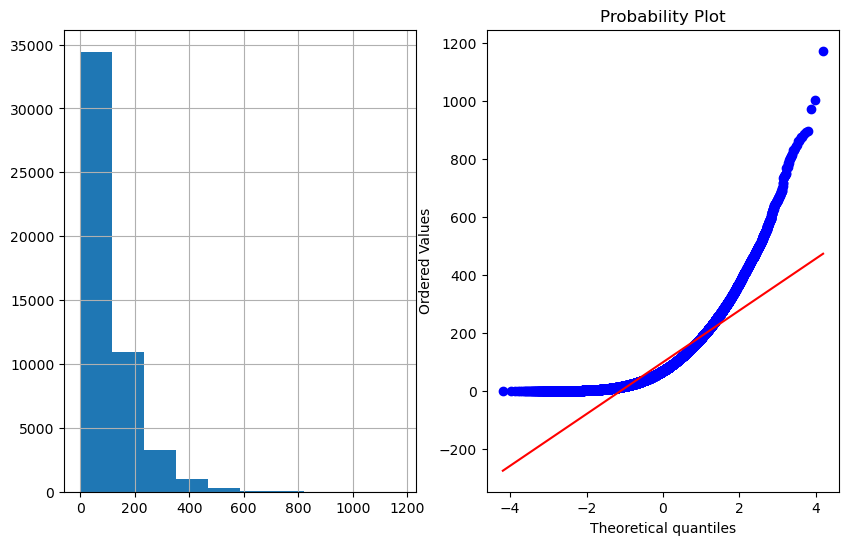

In [31]:
plot_graph(df, 'Transaction_Amount')

In [29]:
### the distribution is left sided skewed so, I will apply the boxcox transformation and
### then look for the outliers

In [32]:
df['Transaction_Amount_boxcox'], parameter = stat.boxcox(df['Transaction_Amount'] + 1)

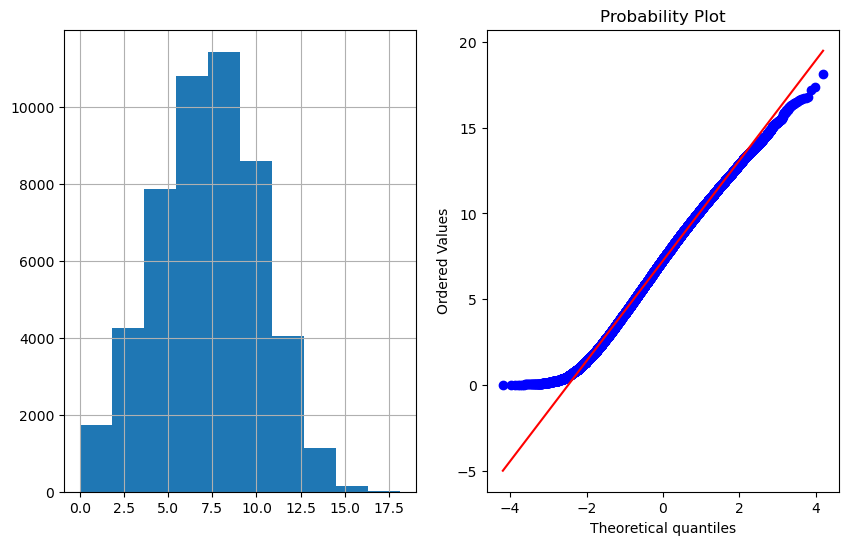

In [33]:
plot_graph(df, 'Transaction_Amount_boxcox')

In [34]:
df.drop('Transaction_Amount', axis = 1, inplace = True)

### Account Balance column

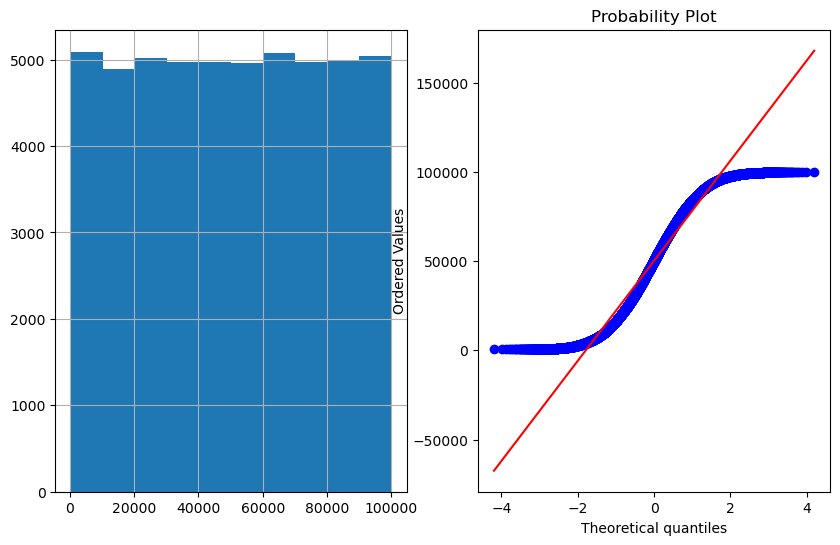

In [35]:
plot_graph(df, 'Account_Balance')

In [38]:
### this one I am leaving it as it is, because the data is very symmetric and 
### very well distributed

### Daily transaction amount column

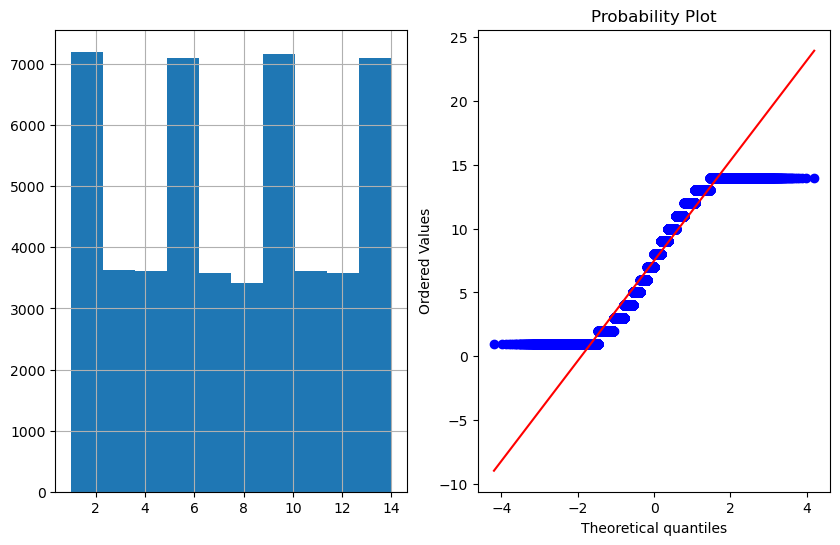

In [36]:
plot_graph(df, 'Daily_Transaction_Count')

In [37]:
df['Daily_Transaction_Count'].value_counts()

Daily_Transaction_Count
3     3634
10    3623
11    3620
4     3606
2     3605
1     3598
12    3586
5     3582
7     3574
14    3571
9     3538
13    3524
6     3521
8     3418
Name: count, dtype: int64

In [41]:
### this one is categorical numeric column, so it will stay as it is

### Avg_transaction amount 7d column

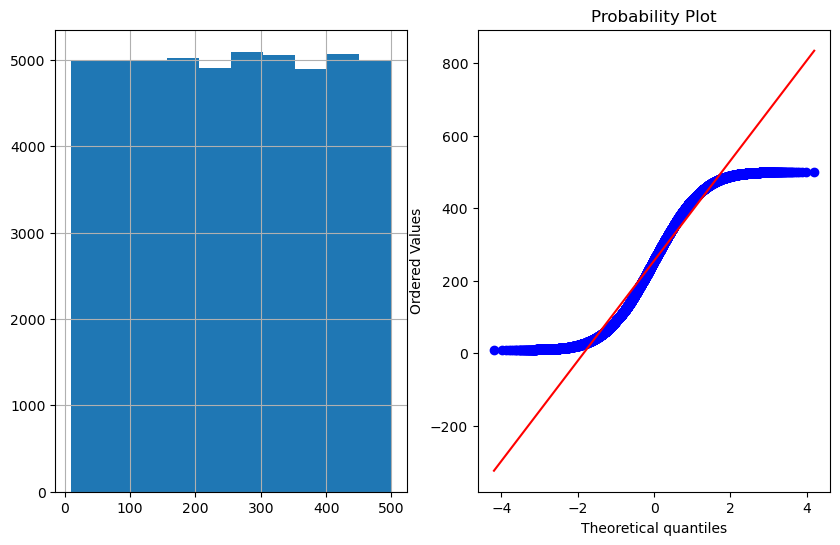

In [38]:
plot_graph(df, 'Avg_Transaction_Amount_7d')

In [46]:
### nice distribution, So I will levae it as it is for now

### failed_transaction count column

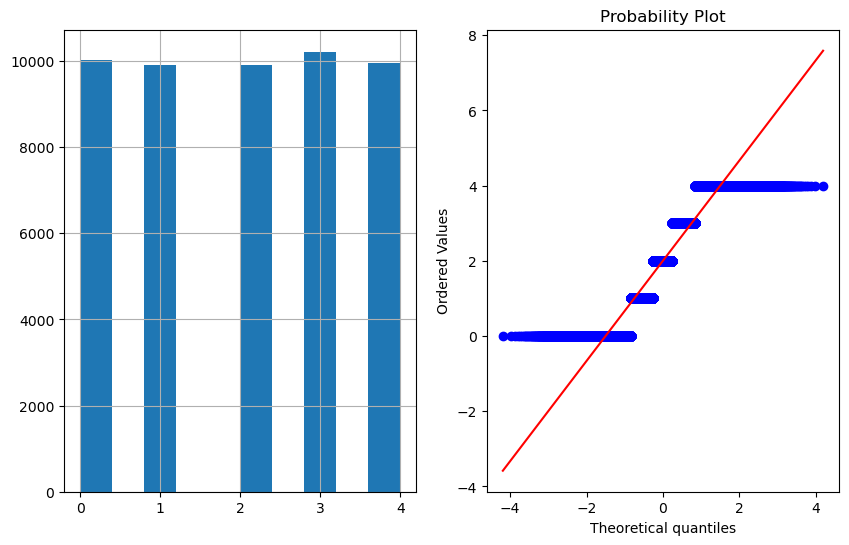

In [39]:
plot_graph(df, 'Failed_Transaction_Count_7d')

In [62]:
### it's categorical numeric column, so it will leave as it is

### Card age column

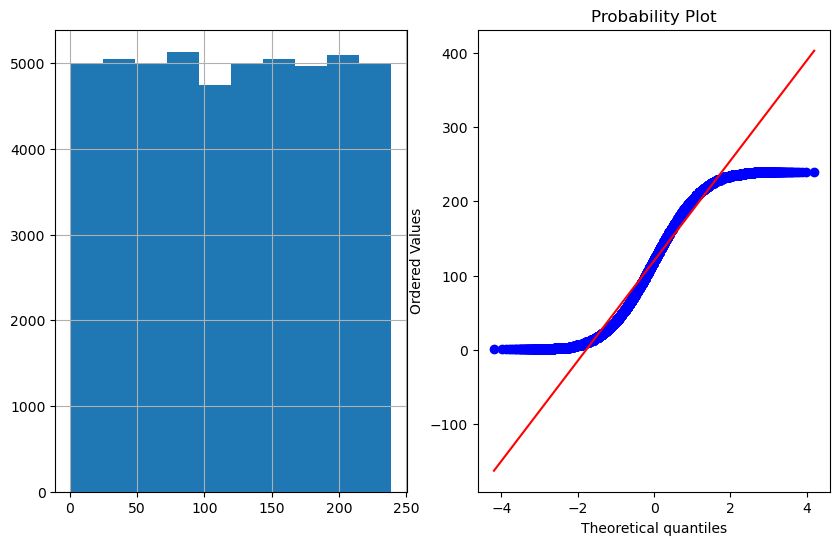

In [40]:
plot_graph(df, 'Card_Age')

In [65]:
### will remain as it is

### transaction_distance column

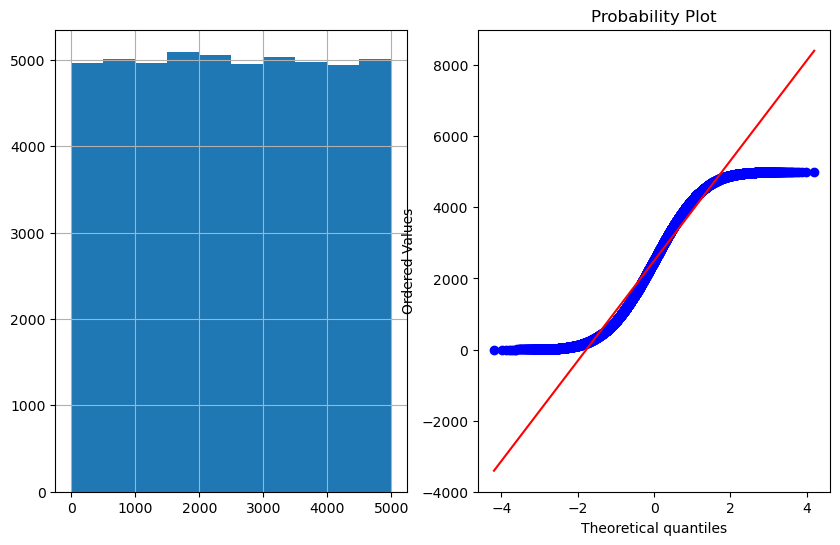

In [41]:
plot_graph(df, 'Transaction_Distance')

In [68]:
### remains the same

### Risk score column

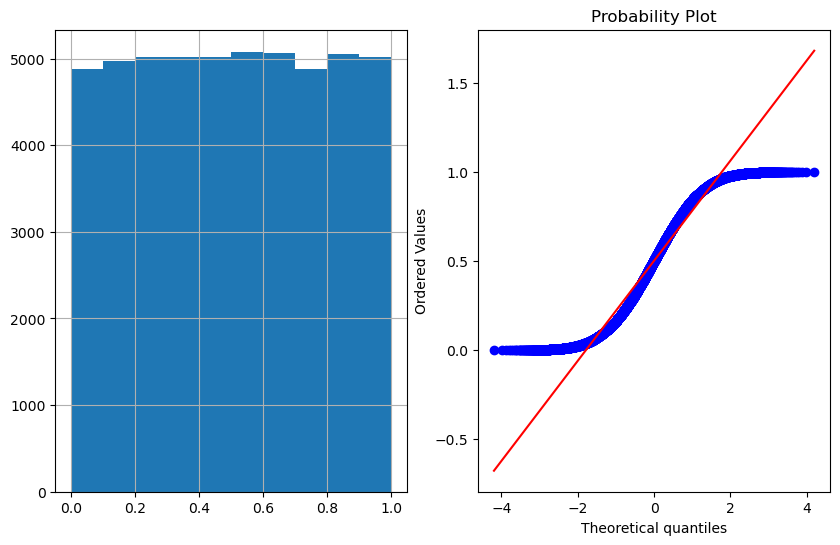

In [42]:
plot_graph(df, 'Risk_Score')

In [70]:
### remains the same

### is weekend column

In [74]:
### this one is as the name suggests categorical column but encoded already
### so I am just gonna check the values

In [43]:
df['Is_Weekend'].value_counts()

Is_Weekend
0    35018
1    14982
Name: count, dtype: int64

### Saving the data and more operations

In [44]:
### so from here on, I am gonna do 3 things basically like, 
### save the dataset as it is clean
### then seperate the cleaned dataset into 2 categories, one for the distance based algos, and another for tree based
### afterwards, I will apply the operations like normalization and all this for the trees based , while keeping the same for 
### distance based, then after I will start the predictions 

In [45]:
df.head()

,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Fraud_Label,transaction_type_ATM Withdrawal,...,merchant_Groceries,merchant_Restaurants,merchant_Travel,auth_method_Biometric,auth_method_OTP,auth_method_PIN,card_type_Amex,card_type_Discover,card_type_Visa,Transaction_Amount_boxcox
0,93213.17,7,437.63,3,65,883.17,0.8494,0,0,0,...,0,0,1,1,0,0,1,0,0,5.917374
1,75725.25,13,478.76,4,186,2203.36,0.0959,0,1,0,...,0,0,0,0,0,0,0,0,0,0.860767
2,1588.96,14,50.01,4,226,1909.29,0.8400,0,1,0,...,0,1,0,1,0,0,0,0,1,5.205741
3,76807.20,8,182.48,4,76,1311.86,0.7935,0,1,1,...,0,0,0,0,1,0,0,0,1,11.399354
4,92354.66,14,328.69,4,140,966.98,0.3819,1,1,0,...,0,0,0,0,0,0,0,0,0,5.373048


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Account_Balance                  50000 non-null  float64
 1   Daily_Transaction_Count          50000 non-null  int64  
 2   Avg_Transaction_Amount_7d        50000 non-null  float64
 3   Failed_Transaction_Count_7d      50000 non-null  int64  
 4   Card_Age                         50000 non-null  int64  
 5   Transaction_Distance             50000 non-null  float64
 6   Risk_Score                       50000 non-null  float64
 7   Is_Weekend                       50000 non-null  int64  
 8   Fraud_Label                      50000 non-null  int64  
 9   transaction_type_ATM Withdrawal  50000 non-null  int32  
 10  transaction_type_Online          50000 non-null  int32  
 11  transaction_type_POS             50000 non-null  int32  
 12  device_type_Laptop

In [48]:
df.to_csv('../data/fraud-detection-cleaned.csv')